
# Topics

## 1. Class - Continued


# Class

In [13]:
import numpy as np

## String is a class of ojects that have various methods. 

In [ ]:
# e.g.: the method upper()
b = 'hello world'.upper()
print(b)

In [ ]:
'''
Another method: .split()

'''
strg = 'Hello world.  Hello San Francisco.'

strg_split = strg.split('.')
print(strg_split)

# Try this
strg_split = strg.split('o')
print(strg_split)

## Breakout Problem:

## Make a class F that implements the function 
## $f(x; a, w) = e − axsin(wx)$

## Write two main programs that do:

  ### a) To practice changing attributes and to illustrate that an instance of this class can be used as a function and a string.  


        from numpy import pi
        f = F(a = 1.0, w = 0.1)
        print(f(pi))
        f.a = 2
        print(f(pi))
        print(f) 
        
        # Use __str__ and one should get, in the present case: 
        e - a*x*sin(w*x); parameters: a = 2, w = 0.1.

   ### b) To further illustrate that an instance of this class can be used as a function -- integrate it from x1 to x2 by using quad

        from scipy.integrate import quad
        f = F(a = 1.0, w = 0.1)
        x1 = pi/3
        x2 = 2*pi/3

   ### It should print out the followig statement:

        The integral of f(x; a, w) = e − ax sin(wx) between x = pi/3 and 2*pi/3 is (the result of the integral you get).

### The formula f(x; a, w) = e − ax sin(wx) should be lifted from the \_\_str\_\_ method instead of being re-written.


In [11]:
import numpy
from scipy.integrate import quad
from numpy import e, sin
import math
class F:
    def __init__(self, a, w):
        self.a = a
        self.w = w
    
    def __call__(self, x):
        return numpy.e - self.a * x * numpy.sin(self.w * x)
    def __str__(self):
        return 'e - a*x*sin(w*x)'
f = F(1.0, 0.1)
i = quad(f, math.pi/3, 2*math.pi/3)[0]
print(i)

2.579921828748761


## Procedural/Functional vs. Object-Oriented Programming:

## "The focus of procedural programming is to break down a programming task into a collection of variables, data structures, and subroutines [i.e. functions in Python], whereas in object-oriented programming it is to break down a programming task into objects that expose behavior (methods) and data (members or attributes) using interfaces. The most important distinction is that while procedural programming uses procedures [functions in Python] to operate on data structures, object-oriented programming bundles the two together, so an "object", which is an instance of a class, operates on its "own" data structure."    (Wikipedia)

In [15]:
'''
Procedural/Functional approach to a problem:
''' 
def perimeter(polygon):
    """
    Given a list of vector vertices (in proper order), 
    returns the perimeter for the associated polygon.
    """
    total = 0
    for i in range(len(polygon)):
        vertex1 = polygon[i]
        # a nice way to make sure the last point connects with the the 0th point:
        # For a polygon with N corners, the Nth corner is the 0th corner
        vertex2 = polygon[(i+1) % len(polygon)]       
        
        distance = np.sqrt((vertex2[0]-vertex1[0])**2 + \
                             (vertex2[1]-vertex1[1])**2)
        total += distance
    return total

# Returns 4.0 -- this can implemented as a doctest
print(perimeter([[0,0],[1,0],[1,1],[0,1]]))        

print(perimeter([[0,-2],[1,1],[3,3],[5,1],[4,0],[4,-3]])) # should return 17.356451097651515



4.0
17.3564510977


## Breakout: Turn the above into a class Polygon

## The concepts of classes and object-oriented programming first appeared in the Simula programming language in the 1960s. Simula was invented by the Norwegian computer scientists Ole-Johan Dahl and Kristen Nygaard, and the impact of the language is particularly evident in C++, Java, and C#, three of the most dominating programming languages in the world today. The invention of object-oriented programming was a remarkable achievement, and the professors Dahl and Nygaard recieved two very prestigious prizes: the von Neumann medal and the Turing prize (popularly known as the Nobel prize of computer science).


## A little more about the "self" 

In [17]:
class Line:
    '''a class for straight lines, y = c0 + c1*x'''
    import numpy as np
    def __init__(self, c0, c1):
        self.c0 = c0
        self.c1 = c1
    
    def __call__(self, x):
        return self.c0 + self.c1*x
    
    def table(self, xlo, xhi, n):
        '''returns a table with n points for x in domain [xlo, xhi].'''
        # initialize s to be an empty string.
        s = ''
        for x in np.linspace(xlo, xhi, n):
            # Note the usage here: self(x).  
            # This works because the special method __call__ is defined.
            # This nicely eliminates the need to define a separate function
            # in order to avoid redundant code.
            y = self(x)        
            s += '{:12g} {:12g}\n'.format(x, y)
        return s


Data for line 1:

           1            7
           2           10
           3           13
           4           16
           5           19
           6           22
           7           25
           8           28
           9           31
          10           34

Data for line 2:

           1          7.5
           2         12.5
           3         17.5
           4         22.5
           5         27.5
           6         32.5
           7         37.5
           8         42.5
           9         47.5
          10         52.5



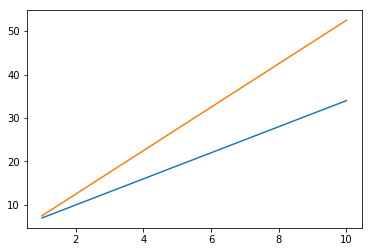

In [18]:
%matplotlib inline
'''Create two instances of the Class Line'''
import matplotlib.pyplot as plt
import numpy as np


xlo, xhi = 1., 10.
n = 10

ln1 = Line(c0 = 4., c1 = 3.)
t1 = ln1.table(xlo, xhi, n)

ln2 = Line(c0 = 2.5, c1 = 5.)
t2 = ln2.table(xlo, xhi, n)

print('Data for line 1:\n')
print(t1)
print('Data for line 2:\n')
print(t2)

x = np.linspace(xlo, xhi, n)
plt.plot (x, ln1(x), x, ln2(x))
plt.show()


## Building class upon class 
(just as you can call a function within another function)

In [21]:
'''
You can take advantage the class Line, which is already defined,
BY USING THE ALREADY DEFINED LINE CLASS AS THE ARGUMENT FOR THE NEW CLASS 

Note: the new class definition accepts an argument!
'''
class SomeNewClass(Line):
    pass

# If you include pass, SomeNewClass is now a class identical to Line.

In [20]:
class Parabola(Line):
    '''
    creating the Parabola class by inheriting 
    the class Line and adding an extra term.
    '''
    # At this point, the class Parabola inherits all attributes & methods in the class Line.

    # Now let's make the necessary changes:
    def __init__(self, c0, c1, c2):
        Line.__init__(self, c0, c1)  # since we're passing 3 attributes we need to 
                                     # make explicit which two are going to inherit 
                                     # the two attributes from Line.
        # To verify inheritance:
        print('Attributes & methods inherited from the class Line:', dir(self))
   
        # new attribute:
        self.c2 = c2                 
        # To verify addition:
        print('Added c2 as attribute:', dir(self))
        

## Mini-breakout Exercise
### Finish the above class definition by adding a __call__ method.
### Remember the class Line has already been inherited in this class;
### you should take advantage of that!

Attributes & methods inherited from the class Line: ['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'c0', 'c1', 'np', 'table']
Added c2 as attribute: ['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'c0', 'c1', 'c2', 'np', 'table']
Data for a parabola:

           0            0
    0.526316      1.31579
     1.05263      2.63158
     1.57895      3.94737
     2.10526      5.26316

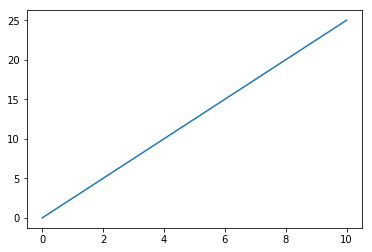

In [22]:
xlo, xhi = 0., 10.
n = 20

para = Parabola(c0 = 0., c1 = 2.5, c2 = 4.8)

# note: we didn't define the attribute table for Parabola;
# it's inherited from Line!
t_para = para.table(xlo, xhi, n)
print('Data for a parabola:\n')
print(t_para)

x = np.linspace(xlo, xhi, n)
plt.plot(x, para(x))
plt.show()


In [23]:
'''
Can use the built-in function super()

https://docs.python.org/3/library/functions.html#super

It adds flexibilty and allows you to use more than one base class more
easily.

'''

class Base():
    def __init__(self, p):
        print("Base created")

class ChildA(Base):
    def __init__(self, p):
        Base.__init__(self, p)

class ChildB(Base):
    def __init__(self, p):
        super().__init__(p)

p = 2
ChildA(p) 
ChildB(p)

Base created
Base created


## Mini-Breakout

## Use

        super()
## to define the class

        Parabolas
        
## It should do everything the class

        Parabola
        
## does (see above).

In [24]:
# note: we didn't include np in the class defintion of Parabolas
print(dir(para))
# since the the np namespace is now under Line, it's under Parabola, too.
print(para.np.zeros(10))

['__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'c0', 'c1', 'c2', 'np', 'table']
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


## Let's take a moment here and absorb the awesomeness of all this!

## Line: Superclass
## Parabola, Parabolas: Subclass

## This allows you to much more easily take an existing numpy class and customize it!

## End of Week 4-3